In [1]:
import pickle
import glob
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import re

def preprocess_text(text):
    if type(text) == list:
        text = ' '.join(text)
    
    return ' '.join((re.sub('[^a-zäöüß ]', ' ', text.strip().lower())).split())

def prep_count(text):
    tokens = preprocess_text(text).split()
    return tokens

In [2]:
search_path = 'found_n_grams'
files = glob.glob(search_path+"/*.pkl")

In [3]:
found_objects = []
for file in files: 
    with open(file, "rb") as f:
        found_objects += pickle.load(f)

In [4]:
seq_len = [len(verse.split()) for verse in found_objects]

128014464
[1. 2. 3. 4. 5. 6.]
[1.22486821e+08 5.17585000e+05 4.71872400e+06 2.50417000e+05
 4.09170000e+04]


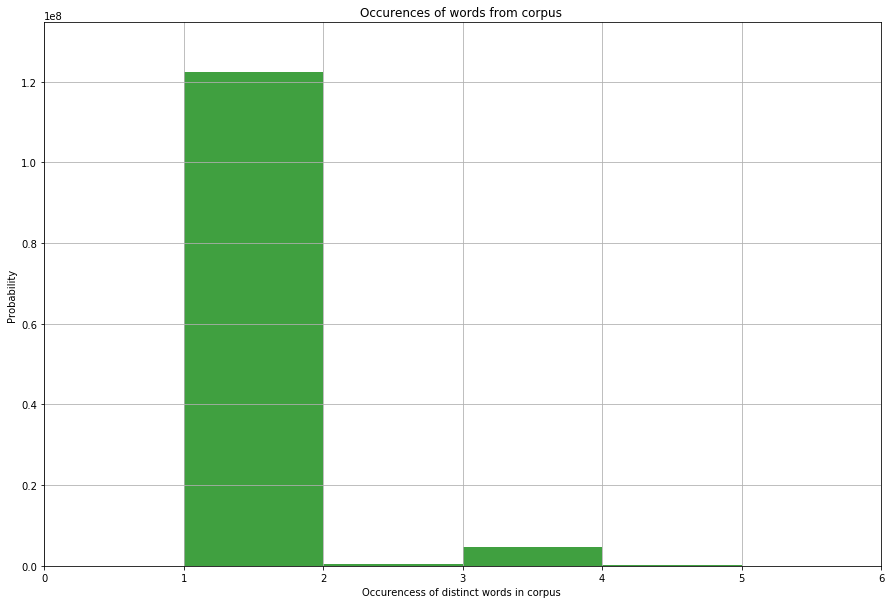

In [17]:
def plot_histogram(vocab,max_cnt = 5):
    x = [v if v < max_cnt else max_cnt+1 for v in vocab]
    print(len(x))
    # the histogram of the data
    #hist,bins = np.histogram(np.asarray(x),bins = max_cnt+1,density=True)
    #print(max(hist))
    n, bins, patches = plt.hist(x, (max_cnt-min(x)+1), density=False, facecolor='g', alpha=0.75)

    print(bins)
    print(n)
    plt.rcParams["figure.figsize"] = (15,10)
    plt.xlabel('Occurencess of distinct words in corpus ')
    plt.ylabel('Probability')
    plt.title('Occurences of words from corpus ')
    #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    plt.xlim(0, max_cnt+1)
    plt.ylim(0, max(n[:max_cnt])*1.1)
    plt.grid(True)
    #plt.bar(bins,hist)
    plt.show()

plot_histogram(seq_len)

In [6]:
found_n_grams = [verse for verse in found_objects if len(verse.split()) > 1]

In [7]:
found_count = Counter(found_n_grams)

14230
[2. 3. 4. 5. 6. 7.]
[  32. 5375. 3444. 2023. 3356.]


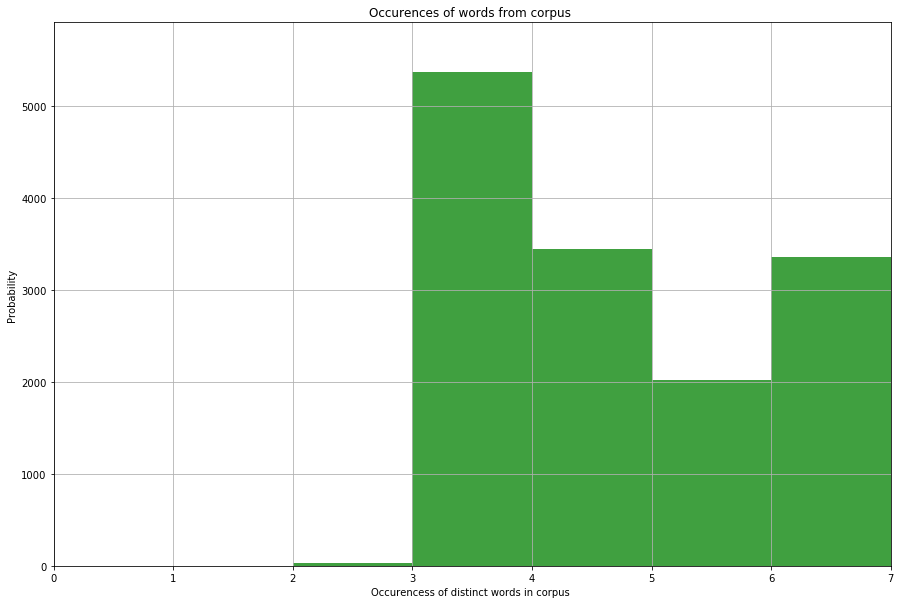

In [18]:
seq_len_found_n_grams = [len(verse.split()) for verse in found_count.keys()]

plot_histogram(seq_len_found_n_grams,max_cnt=6 )

In [10]:
len(found_count.keys())

14230

In [20]:
gutenberg_df = pd.read_csv('../gutenberg/data/gutenberg.csv')

In [21]:
authors = (list(set(list(gutenberg_df['author']))))
authors.sort()

In [38]:
len(gutenberg_df)

105990

In [29]:
author_found = []
author_len_found = []
strophe_id_found = []
percentage_found =  []
found_part = []
strophe_found = []
cnt = 0
verse_len = []
for author in tqdm(authors):

    author_df = gutenberg_df[gutenberg_df['author'] == author]
    author_df = author_df.reset_index(drop=True)
    author_len = len(author_df)
    for id, strophe in author_df.iterrows():
        
        sum_found = 0
        cnt += 1
        found_verses = []
        try:
            for verse in strophe['text'].split('\n'):
                search_verse = preprocess_text(verse)
                if search_verse in found_count.keys():
                    sum_found += 1
                    found_verses.append(search_verse)

            if sum_found > 0:
                percentage_found.append(sum_found/len(strophe['text'].split('\n')))
                author_found.append(author)
                author_len_found.append(author_len)
                strophe_id_found.append(id)
                strophe_found.append(strophe['text'])
                found_part.append(found_verses)
                verse_len.append(len(search_verse.split()))
        except:

            print('except')

found_strophe_df = pd.DataFrame(zip(author_found,strophe_found,found_part,percentage_found),columns=['author','strophe','found part','percentage'])
found_strophe_df = found_strophe_df.sort_values(by='percentage', ascending=False)

found_strophe_df.head()


 18%|█▊        | 35/190 [00:02<00:06, 22.77it/s]

except


 27%|██▋       | 51/190 [00:02<00:07, 17.73it/s]

except
except
except
except
except
except
except
except
except
except
except


 35%|███▍      | 66/190 [00:03<00:06, 18.07it/s]

except
except


 80%|████████  | 152/190 [00:09<00:01, 24.89it/s]

except


 87%|████████▋ | 166/190 [00:10<00:00, 25.31it/s]

except
except


 98%|█████████▊| 186/190 [00:11<00:00, 25.68it/s]

except
except
except


100%|██████████| 190/190 [00:11<00:00, 16.26it/s]


,author,strophe,found part,percentage
10054,soyfer,Denn wir haben ...,[denn wir haben],1.0
124,antholog,"Von deiner Liebe\n Sagtest du ihnen,\n ...","[von deiner liebe, sagtest du ihnen, von deine...",1.0
4560,goethe,"Wer sich nicht nach der Decke streckt,\n ...","[wer sich nicht nach der decke streckt, dem bl...",1.0
5593,heine,Mein Herz ist wie die Sonne\n So flam...,"[mein herz ist wie die sonne, so flammend anzu...",1.0
2843,engelke,Sie tranken Blut aus ihrer Schale – – –,[sie tranken blut aus ihrer schale],1.0


In [ ]:
found_strophe_df.to_csv('sequence_search/found_strophes.csv')

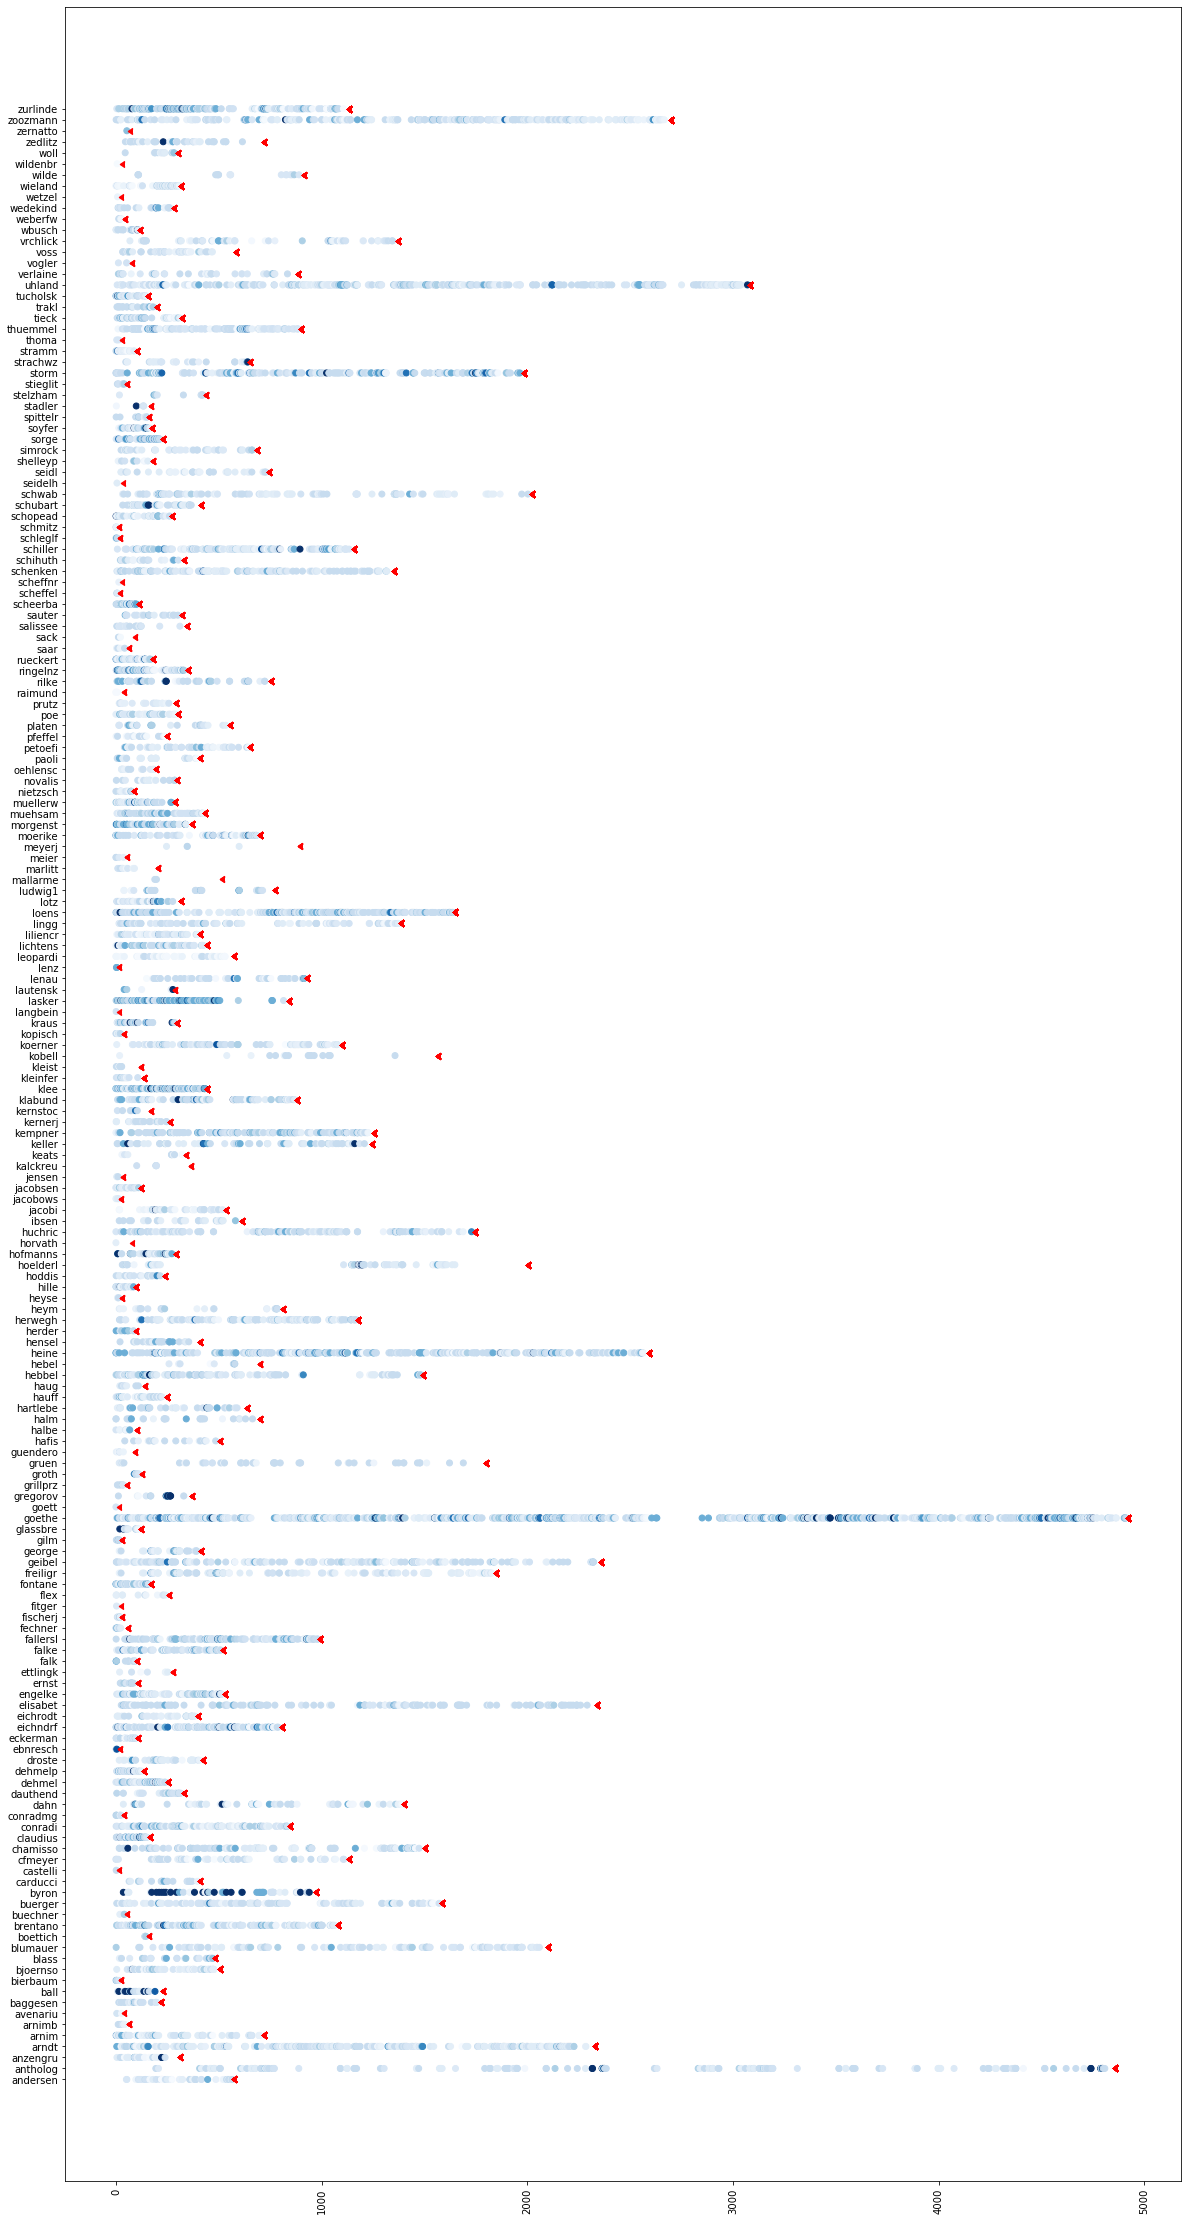

In [37]:
plt.scatter(strophe_id_found,author_found,  c=percentage_found,cmap='Blues')
plt.scatter(author_len_found,author_found,color='Red',marker=4)
plt.rcParams["figure.figsize"] = (20,40)
plt.xticks(rotation=90)
plt.show()

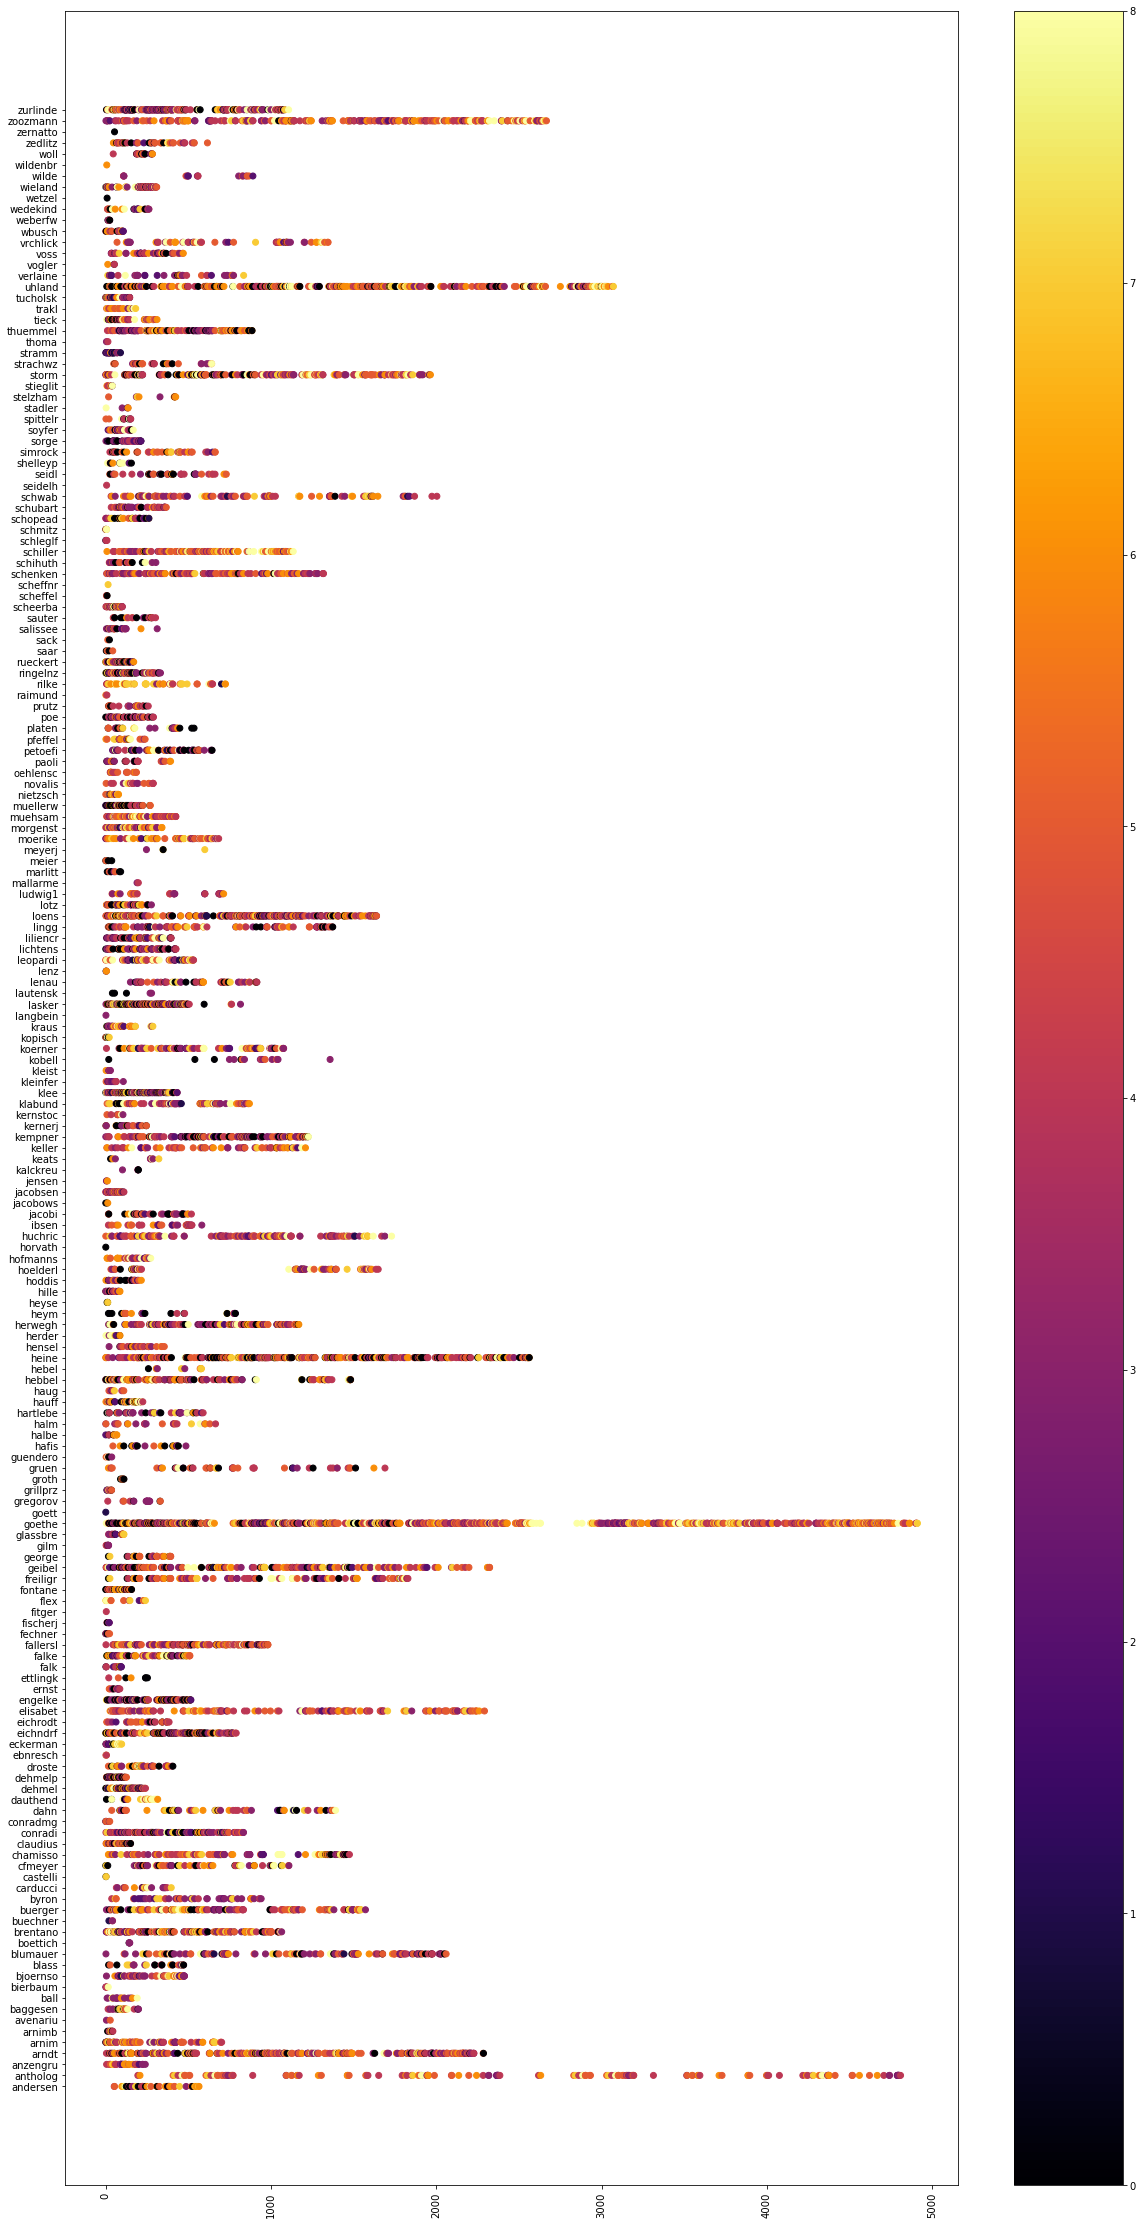

In [80]:
verse_len_clip = [val if val < 8 else 8 for val in verse_len]
plt.scatter(strophe_id_found,author_found,  c=verse_len_clip,cmap='inferno')
plt.rcParams["figure.figsize"] = (20,40)
plt.xticks(rotation=90)
plt.colorbar()

plt.show()

In [66]:
author_poem_found = []
poem_id_found = []
poem_found = []
percentage_poem_found =  []
found_part = []
cnt = 0

def add_strophes(strophes):

    poem = ''
    for strophe in list(strophes):
        try:
            poem += strophe.strip()+ '\n'
        except:
            pass

    return poem.strip()

for author in tqdm(authors):

    author_df = gutenberg_df[gutenberg_df['author'] == author]
    author_df = author_df[['author','title','text']]
    author_df = author_df.reset_index(drop=True)
    poem_df = (
    author_df.groupby(author_df['title'].ne(author_df['title'].shift()).cumsum())
        .aggregate({'title': 'first',
                    'text': add_strophes,
                    'author': 'first'})
        .reset_index(drop=True)
)

    for id, poem in poem_df.iterrows():
        
        sum_found = 0
        cnt += 1
        found_verses = []
        try:
            for verse in poem['text'].split('\n'):
                search_verse = preprocess_text(verse)
                if  search_verse in found_count.keys():
                    sum_found += 1
                    found_verses.append(search_verse)
            if sum_found > 0:
                percentage_poem_found.append(sum_found/len(poem['text'].split('\n')))
                author_poem_found.append(author)
                poem_id_found.append(id)
                poem_found.append(poem['text'])
                found_part.append(found_verses)
        except:

            print('except')

found_df = pd.DataFrame(zip(author_poem_found,poem_found,found_part,percentage_poem_found),columns=['author','poem','found part','percentage'])

100%|██████████| 190/190 [00:04<00:00, 43.15it/s]


In [67]:
found_df = found_df.sort_values(by='percentage', ascending=False)

found_df.to_csv('sequence_search/found_poems.csv')
found_df.head()



,author,poem,found part,percentage
1463,glassbre,(Sie prügeln sich.),[sie prügeln sich],1.0
922,eichndrf,Dein Bildnis wunderselig\n Hab ich im H...,"[dein bildnis wunderselig, hab ich im herzensg...",1.0
649,claudius,"Wenn jemand eine Reise tut,\n So kann er ...","[wenn jemand eine reise tut, so kann er was ve...",1.0
5040,zoozmann,Das Paradies der Erde\n Liegt auf dem Rü...,"[das paradies der erde, liegt auf dem rücken d...",1.0
868,eichndrf,"Schläft ein Lied in allen Dingen,\n D...","[schläft ein lied in allen dingen, die da träu...",1.0


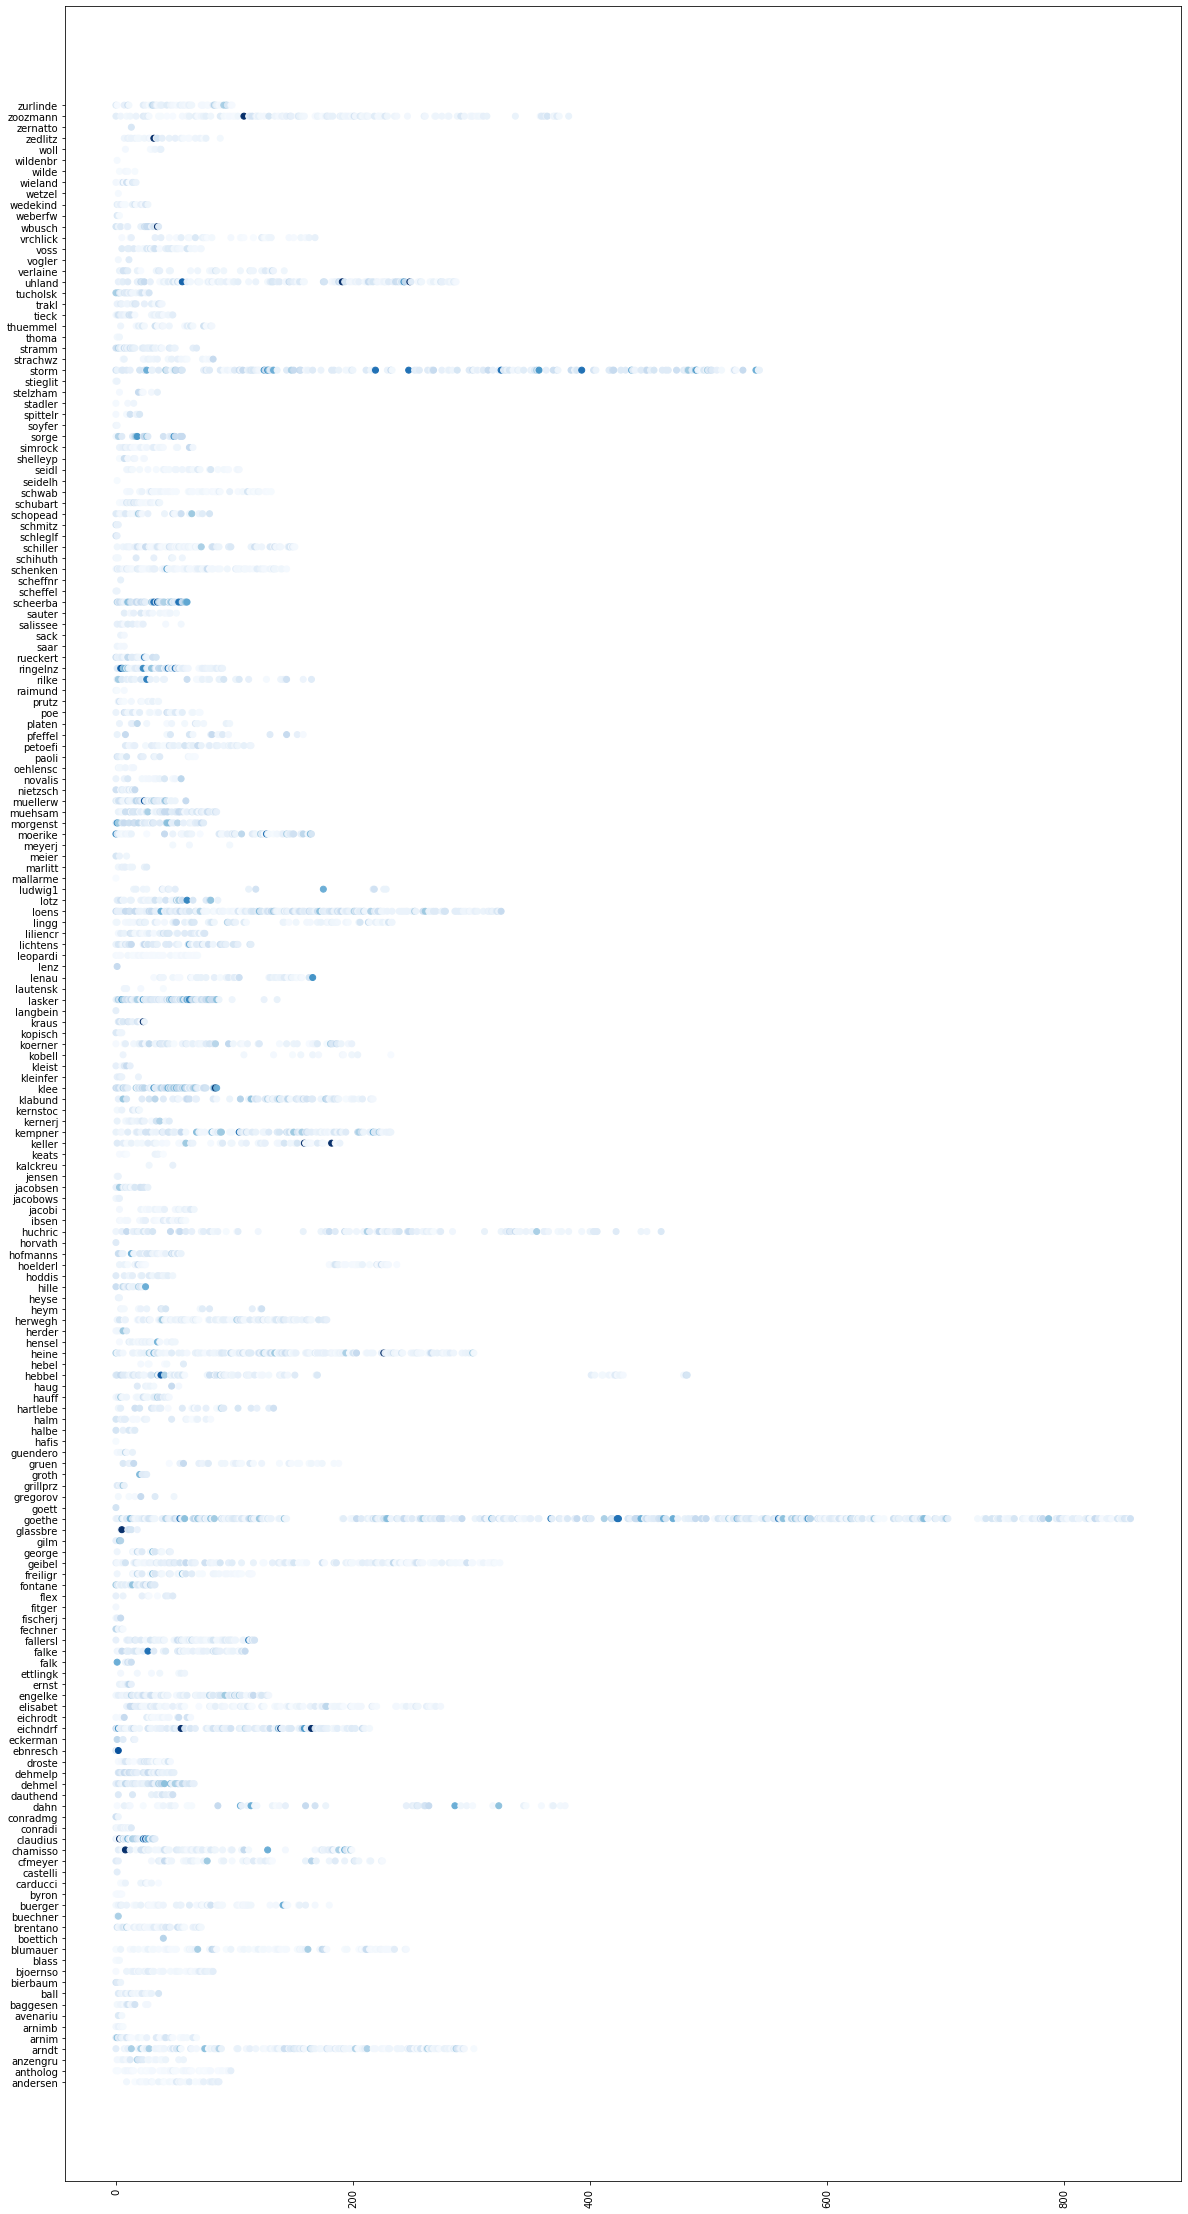

In [68]:
plt.scatter(poem_id_found,author_poem_found,  c=percentage_poem_found,cmap='Blues')
plt.rcParams["figure.figsize"] = (20,40)
plt.xticks(rotation=90)
plt.show()